In [21]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
img_array=cv2.imread(r"C:\Users\APPLE\Desktop\training\0\Training_3579517.jpg")

In [6]:
img_array.shape

(48, 48, 3)

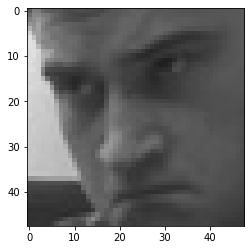

In [7]:
plt.imshow(img_array)

In [22]:
Datadirectory = r"C:\Users\APPLE\Desktop\training"                 # training dataset

In [23]:
Classes=["0","1","2","3","4","5","6"]       # List of classes

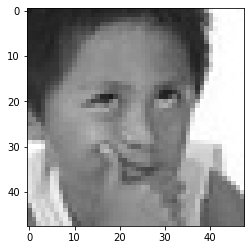

In [24]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtogrb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

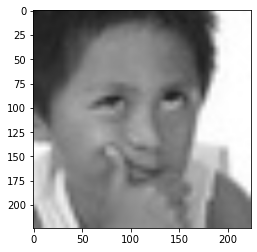

In [25]:
img_size = 224 #ImageNet => 224x224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
new_array.shape

(224, 224, 3)

## read all the images and convert them to array

In [27]:
training_Data = []   ## data array

def create_training_Data():    
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [28]:
create_training_Data()

In [29]:
print(len(training_Data))

15579


In [30]:
temp = np.array(training_Data)

C:\Users\APPLE\AppData\Local\Temp/ipykernel_5724/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [31]:
temp.shape

(15579, 2)

In [32]:
import random 
random.shuffle(training_Data)

In [33]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3) # converting it to 4 dimension

In [34]:
X.shape

(15579, 224, 224, 3)

In [36]:

# normalize the data
for i in range(0,15579):
    X[i]=X[i]/255.0

In [37]:
y[0]

5

In [38]:
Y = np.array(y)

In [39]:
type(y)

list

In [40]:
Y.shape

(15579,)

## deep learning for training -Transfer Learning

In [41]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
model = tf.keras.applications.MobileNetV2() ## pre-trained model

In [43]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Transfer Learning -Tuning,weights will start from last check point

In [44]:
base_input = model.layers[0].input #input

In [45]:
base_output = model.layers[-2].output

In [46]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [47]:
final_output = layers.Dense(128)(base_output)            # adding new layer,after the output of the glbal pooling layer
final_ouput = layers.Activation('relu')(final_output)    # activation function 
final_output = layers.Dense(64)(final_ouput)
final_ouput =layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)  # my classes are 07 classification layer

In [48]:
final_output #output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [49]:
new_model = keras.Model(inputs = base_input,outputs=final_output)

In [50]:
new_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [51]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [40]:
 new_model.fit(X,Y,epochs =10)

Epoch 1/10
817/817 [==============================] - 4117s 5s/step - loss: 1.8176 - accuracy: 0.2356
Epoch 2/10
817/817 [==============================] - 3238s 4s/step - loss: 1.8106 - accuracy: 0.2402
Epoch 3/10
817/817 [==============================] - 3260s 4s/step - loss: 1.8085 - accuracy: 0.2446
Epoch 4/10
817/817 [==============================] - 3259s 4s/step - loss: 1.8085 - accuracy: 0.2451
Epoch 5/10
817/817 [==============================] - 2790s 3s/step - loss: 1.8065 - accuracy: 0.2457
Epoch 6/10
817/817 [==============================] - 2732s 3s/step - loss: 1.8136 - accuracy: 0.2394
Epoch 7/10
817/817 [==============================] - 2730s 3s/step - loss: 1.8138 - accuracy: 0.2402
Epoch 8/10
817/817 [==============================] - 2736s 3s/step - loss: 1.8083 - accuracy: 0.2439
Epoch 9/10
817/817 [==============================] - 3161s 4s/step - loss: 1.8068 - accuracy: 0.2448
Epoch 10/10
817/817 [==============================] - 4096s 5s/step - loss: 1.804

In [52]:
 new_model.fit(X,Y,epochs =1)

487/487 [==============================] - 2082s 4s/step - loss: 1.8723 - accuracy: 0.1964


In [42]:
 new_model.fit(X,Y)

817/817 [==============================] - 2890s 4s/step - loss: 1.8021 - accuracy: 0.2475


In [43]:
new_model.save("my_model_95p07.h5")

In [54]:
new_model = tf.keras.models.load_model('my_model_95p07.h5')

In [55]:
frame = cv2.imread(r"C:\Users\APPLE\Desktop\download.jpg")

In [56]:
frame.shape

(225, 225, 3)

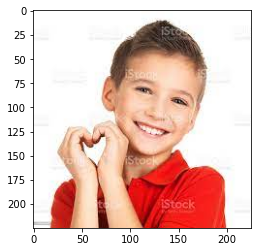

In [57]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [58]:
# we need face detection algoritm (gray image)

In [59]:
faceCascade = cv2.CascadeClassifier(r"C:\Users\APPLE\Desktop\haarcascade_frontalface_default.xml")

In [60]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [61]:
gray.shape

(225, 225)

In [62]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(225,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Faces not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

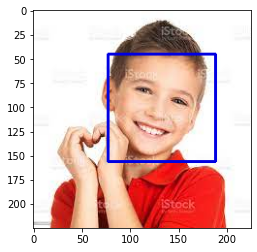

In [63]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

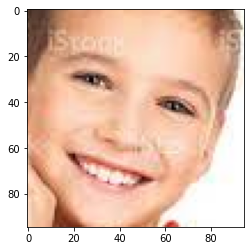

In [64]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [65]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimention
dinal_image = final_image/225.0

In [66]:
predicitions = new_model.predict(final_image)

In [67]:
predicitions[0]

array([0.14375325, 0.01930492, 0.17599165, 0.17183042, 0.12502962,
       0.10015336, 0.26393685], dtype=float32)

In [68]:
np.argmax(predicitions)

6

In [69]:
 
path = r'C:\Users\APPLE\Desktop\haarcascade_frontalface_default.xml'
font_scale =1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr = (255,255,255)

#make a black image
img = np.zeros((500,500))

#set some text
text = "some text in a box!"

#get the width and height of the box
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

#set the text start position
text_offset_x=10
text_offset_y=img.shape[0] -25

#make the coords of the box with a small padding of two pixels

box_coords =((text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap = cv2.VideoCapture(1)
#check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(r'C:\Users\APPLE\Desktop\haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(225,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("Faces not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
            

    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    predicitions = new_model.predict(final_image)

    font = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(predicitions)==0):
        status = "Angry"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,0,225))

    elif(np.argmax(predicitions)==1 ):
        status="Disgust"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,0,225))
        
    elif(np.argmax(predicitions)==2):
        status="Fear"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,0,225))
        
    elif(np.argmax(predicitions)==3):
        status="Happy"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,0,225))
    elif(np.argmax(predicitions)==4):
        status="Sad"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,0,225))
    elif(np.argmax(predicitions)==5):
        status="Surprise"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,0,225))
    elif(np.argmax(predicitions)==6):
        status="Neutral"

        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)

        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+w),(0,255,0))


    cv2.imshow('Face Emotion Recognition',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [70]:
import cv2